In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.style.use('~/line_plot.mplstyle')

import json, os, pickle
from scipy.signal import argrelmin
from pathlib import Path

C6 = 2 * np.pi * .862690

def generate_sites_square_lattice(n_x, n_y):
    sites = []

    y_ind = 0
    
    for ii in range(n_x):
        for jj in range(n_y):
            sites.append([ii, y_ind])

            if ii % 2 == 0:
                y_ind += 1
            else:
                y_ind -= 1

        if ii % 2 == 0:
            y_ind -= 1
        else:
            y_ind += 1
    return sites

In [92]:
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/23-07-14_14-01-12"
# top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/good_runs/full_range_pretty_good"
top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/good_runs/best_yet"
top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/1d/23-07-14_14-01-12"

top_dir = "/global/homes/m/mhirsbru/Rydberg-Array-DMRG/data/square/phase_diagram"

with open(top_dir + "/compiled_results.pkl", "rb") as io:
    compiled_results = pickle.load(io)

rb_over_a_ax = compiled_results["rb_over_a_ax"]
rb_over_a_pts = len(rb_over_a_ax)

delta_over_omega_ax = compiled_results["delta_over_omega_ax"]
delta_over_omega_pts = len(delta_over_omega_ax)

energies = compiled_results["energies"]
ent_entropies = compiled_results["entanglement_entropies"]
densities = compiled_results["densities"]

In [93]:
d2E2 = []
d2E2_minima = []

for ii in range(rb_over_a_pts):
  temp = np.gradient(energies[ii], delta_over_omega_ax, edge_order=2)
  temp = np.gradient(temp, delta_over_omega_ax, edge_order=2)

  d2E2.append(temp)
  d2E2_minima.append(argrelmin(temp)[0])

e_minima_x = []
e_minima_y = []
for ii, a in enumerate(rb_over_a_ax):
    minima = d2E2_minima[ii]
    
    for minimum in minima:
        if minimum == 0 or minimum == len(delta_over_omega_ax) - 1:
            continue
        else:
            e_minima_x.append(delta_over_omega_ax[minimum])
            e_minima_y.append(a)

In [94]:
d2EE2 = []
d2EE2_minima = []

for ii in range(rb_over_a_pts):
  temp = np.gradient(ent_entropies[ii], delta_over_omega_ax, edge_order=2)
  temp = np.gradient(temp, delta_over_omega_ax, edge_order=2)

  d2EE2.append(temp)
  d2EE2_minima.append(np.argmin(temp))

d2EE2 = np.reshape(d2EE2, (rb_over_a_pts, -1))

ee_minima_x = []
ee_minima_y = []
for ii, a in enumerate(rb_over_a_ax):
    minimum = d2EE2_minima[ii]

    if minimum == 0 or minimum == len(delta_over_omega_ax) - 1:
        continue
    else:
        ee_minima_x.append(delta_over_omega_ax[minimum])
        ee_minima_y.append(a)

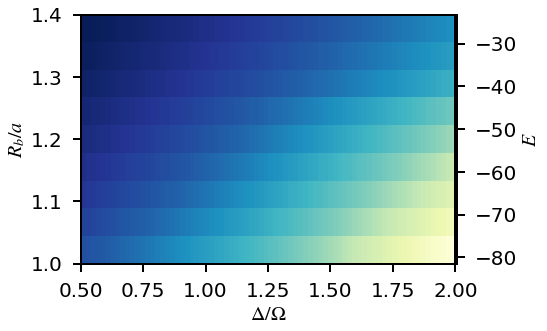

In [95]:
aspect = 100
pad_fraction = 0.5

fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(energies, cmap="YlGnBu", extent=(delta_over_omega_ax[0], delta_over_omega_ax[-1], rb_over_a_ax[0], rb_over_a_ax[-1]), aspect="auto", origin="lower")
# ax.scatter(e_minima_x, e_minima_y, s=100, c='w', marker="o", edgecolors='black')

divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
fig.colorbar(im, cax=cax, label=r"$E$")

ax.set_xlabel(r"$\Delta/\Omega$")
ax.set_ylabel(r"$R_b/a$")

plt.tight_layout()
plt.show()

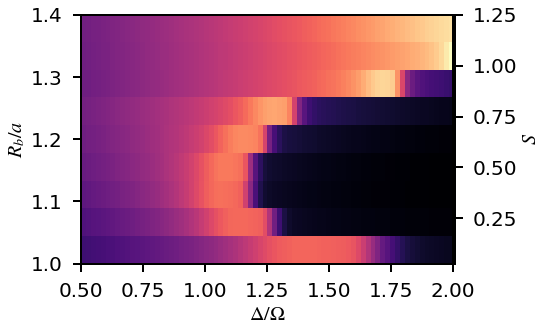

In [96]:
aspect = 100
pad_fraction = 0.5

fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(ent_entropies, cmap="magma", extent=(delta_over_omega_ax[0], delta_over_omega_ax[-1], rb_over_a_ax[0], rb_over_a_ax[-1]), aspect="auto", origin="lower")
# ax.scatter(ee_minima_x, ee_minima_y, s=100, c='w', marker="o", edgecolors='black')

divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
fig.colorbar(im, cax=cax, label=r"$S$")

ax.set_xlabel(r"$\Delta/\Omega$")
ax.set_ylabel(r"$R_b/a$")

plt.tight_layout()
plt.show()

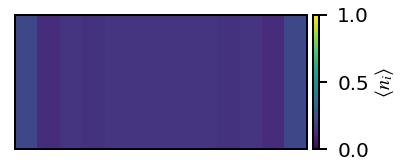

In [100]:
aspect = 20
pad_fraction = 0.8

a_ind = 6
delta_ind = 0

n_x = 13
n_y = 6
sites = generate_sites_square_lattice(n_x, n_y)

temp_density = np.zeros((n_x, n_y))
for ii, site in enumerate(sites):
    temp_density[site[0], site[1]] = densities[a_ind, delta_ind].flatten()[ii]
    
fig, ax = plt.subplots()
im = ax.imshow(temp_density.T, cmap='viridis', origin="lower", vmin=0, vmax=1)

ax.set_xticks([])
ax.set_yticks([])

divider = make_axes_locatable(ax)
width = axes_size.AxesY(ax, aspect=1./aspect)
pad = axes_size.Fraction(pad_fraction, width)
cax = divider.append_axes("right", size=width, pad=pad)
plt.colorbar(im, cax=cax, ax=ax, label=r"$\langle n_i \rangle$")

plt.tight_layout()
plt.show()

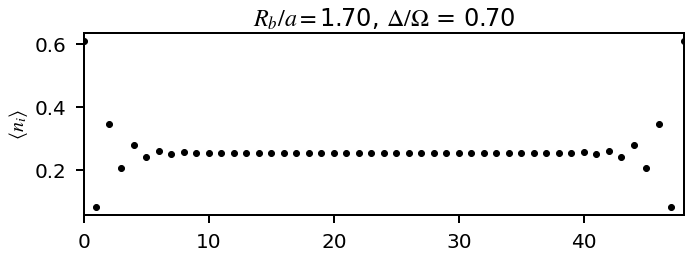

In [91]:
a_ind = 5
delta_ind = 0

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(densities[a_ind, delta_ind], 'ko')
ax.set_ylabel(r"$\langle n_i \rangle$")
ax.set_title(fr"$R_b / a=${rb_over_a_ax[a_ind]:.2f}, $\Delta/\Omega$ = {delta_over_omega_ax[delta_ind]:.2f}")

plt.tight_layout()
plt.show()

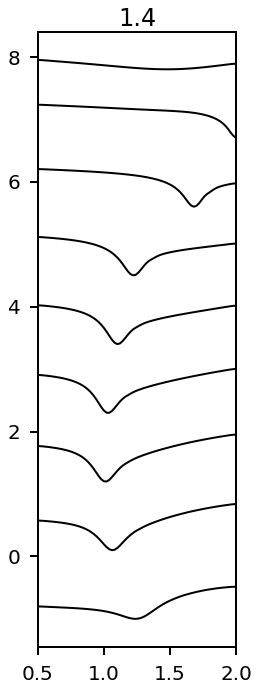

In [67]:
fig, ax = plt.subplots(figsize=(4, 10))

for ind in range(rb_over_a_pts):
    # ax.plot(delta_over_omega_ax, energies[ind] / np.max(np.abs(energies[ind])) + ind * 1.1, 'k-')
    ax.plot(delta_over_omega_ax, d2E2[ind] / np.max(np.abs(d2E2[ind])) + ind * 1.1, 'k-')
                       
ax.set_title(rb_over_a_ax[ind])                      
plt.tight_layout()
plt.show()

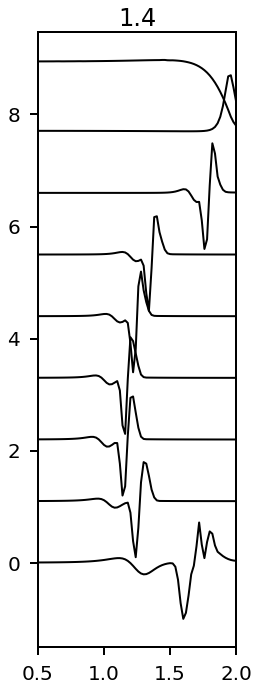

In [68]:
fig, ax = plt.subplots(figsize=(4, 10))

for ind in range(rb_over_a_pts):
    # ax.plot(delta_over_omega_ax, ent_entropies[ind] / np.max(np.abs(ent_entropies[ind])) + ind * 1.1, 'k-')
    ax.plot(delta_over_omega_ax, d2EE2[ind] / np.max(np.abs(d2EE2[ind])) + ind * 1.1, 'k-')
                       
ax.set_title(rb_over_a_ax[ind])                      
plt.tight_layout()
plt.show()

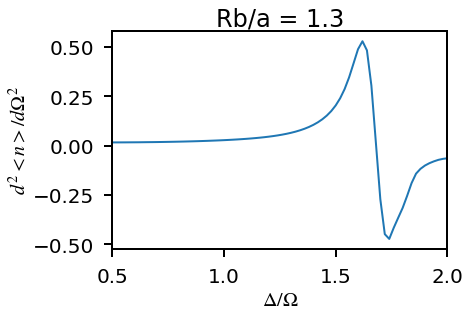

In [69]:
ind = 6

data = np.mean(densities, axis=-1)[ind]
data = np.gradient(data, delta_over_omega_ax, edge_order=2)
data = np.gradient(data, delta_over_omega_ax, edge_order=2)

plt.plot(delta_over_omega_ax, data)
plt.title(f"Rb/a = {rb_over_a_ax[ind]:.1f}")
plt.ylabel(r"$d^2<n>/d\Omega^2$")
plt.xlabel(r"$\Delta/\Omega$")
plt.show()